In [2]:
# import some necessary libraries
# warning: avoid warning from packages
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 
# data process
import pandas as pd # data processing, CSV file I/O 
import  numpy as np # linear algebra
# data visualization
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
# set option for visilazition
color = sns.color_palette()
# sns.set_style('darkgrid')
sns.set(style='white', context='notebook', palette='deep')
# Set visualisation colours
mycols = ["#66c2ff", "#5cd6d6", "#00cc99", "#85e085", "#ffd966", "#ffb366", "#ffb3b3", "#dab3ff", "#c2c2d6"]
sns.set_palette(palette = mycols, n_colors = 4)
print('Data Manipulation, Mathematical Computation and Visualisation packages imported!')


Data Manipulation, Mathematical Computation and Visualisation packages imported!


# 导入统计相关的工具

In [3]:
"""
function:Statistical packages used for transformations
stats: staticstic function in scipy 
skew: for partial norm distributions  skewed coefficient.
boxcox1p: transform data or feature to normal distribution 
https://blog.csdn.net/u012735708/article/details/84755595,determine the lambda估算的值)
pearsonr: 皮尔逊系数
"""
from scipy import stats 
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats.stats import pearsonr
print('Statistical packages imported!')

Statistical packages imported!


# 导入回归相关的算法

In [4]:

"""
ElasticNet:弹性网络
Lasso: 奥卡姆剃刀回归，正则化
BayesianRidge: 贝叶斯回归
常见的线性回归模型:http://blog.sina.com.cn/s/blog_62970c250102xfgb.html，LassoLarsIC这个模型不熟悉
ensemble 方法: 随即森林回归，GBDT回归，xgboost回归，lightGBM 回归
numpy.dtype size changed, may indicate binary incompatibility 问题解决方案: numpy 版本过高，调低numpy版本
"""
# Algorithms used for modeling
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
import lightgbm as lgb
print('Algorithm packages imported!')    


Algorithm packages imported!


# 导入数据预处理相关的方法

In [5]:

"""
make_pipeline: construct pipeline for processing data
RobustScaler: 针对离群点的RobustScaler有些时候，数据集中存在离群点，用Z-Score进行标准化，但是结果不理想，
因为离群点在标准化后丧失了利群特性。RobustScaler针对离群点做标准化处理，该方法对数据中心化的数据的缩放健壮性有更强的参数控制能力。
StandScaler(Z-Score): 新数据=（原数据-均值）/标准差
归一化Max-Min:新数据=（原数据-最小值）/（最大值-最小值）
"""
# Pipeline and scaling preprocessing will be used for models that are sensitive
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#     from sklearn.feature_selection import SelectFromModel
#     from sklearn.feature_selection import SelectKBest
#     from sklearn.feature_selection import chi2
#     模型选择的模块用的比较少
print('Pipeline and preprocessing packages imported!')

Pipeline and preprocessing packages imported!


# 导入模型调参相关的包

In [6]:

# Model select packages used for sampling dataset and optimising parameters
"""
KFold: 它将原始数据分成K组(K-Fold)，将每个子集数据分别做一次验证集，其余的K-1组子集数据作为训练集，这样会得到K个模型。
cross_val_score: 交叉验证的评估值
train_test_split: 数据切割成训练集和测试集（验证集）
GridSearchCV:网格搜索参数，进行模型搜索
ShuffleSplit： train_test_split的参数中shuffle参数设定为True
"""
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
print('Model selection packages imported!')

Model selection packages imported!


In [7]:
from subprocess import check_output
print(check_output(['ls']).decode("utf8"))  # check the files available in the directory
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #设定pandas数字格式，小数点后3位

1-house-prices-solution-top-1.ipynb
Stacked Regressions _ Top 4% on LeaderBoard.ipynb
Untitled.ipynb
Untitled1.ipynb
concat_kaggle_house_price.ipynb
data_description.txt
data_description.zip
kaggle house price.ipynb
sample_submission.csv
submission.csv
test.csv
train.csv
v1.ipynb
v2 copy.ipynb
v2.ipynb
v3.ipynb
v4.ipynb



# 读取数据

In [8]:
# import and put the train and test datasets in  pandas dataframe
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

train.head(5)
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
# save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

# drop the 'Id' column since it's unnecessary for the prediction
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)


# 数据整体调整

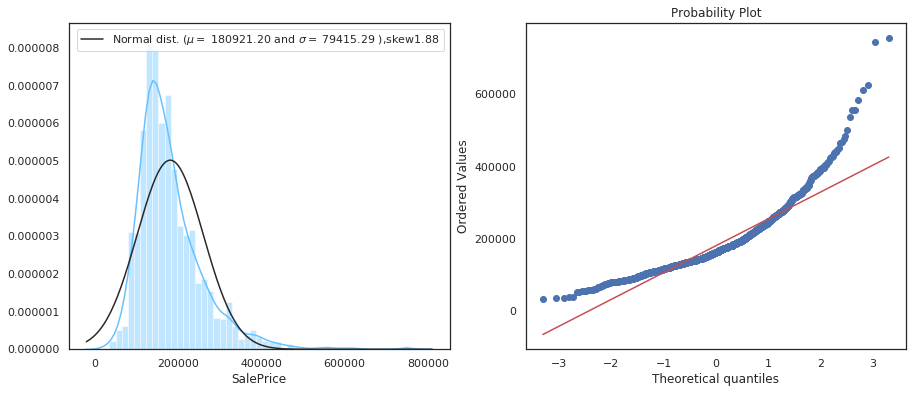

In [10]:
"""
P-P图是根据变量的累积概率对应于所指定的理论分布累积概率绘制的散点图，用于直观地检测样本数据是否符合某一概率分布。
如果被检验的数据符合所指定的分布，则代表样本数据的点应当基本在代表理论分布的对角线上。
"""

plt.subplots(figsize=(15,6))
plt.subplot(1,2,1)
g=sns.distplot(train['SalePrice'],fit=norm)

mu, sigma, = norm.fit(train['SalePrice'])  # 均值，标准差
skew_co  =train['SalePrice'].skew() # 偏态系数
g.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} ),skew{:.2f}'.format(mu, sigma,skew_co)],
            loc='best')
plt.subplot(1,2,2)
g = stats.probplot(train['SalePrice'], plot=plt)


- The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.
- 目标数据右偏态，大部分的统计原理和参数检验都是基于正态分布推得，因此可以将目标变量转化标准正态分布


In [11]:
# # #We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
# train["SalePrice"] = np.log1p(train["SalePrice"])

# #Check the new distribution 
# sns.distplot(train['SalePrice'] , fit=norm);

# # Get the fitted parameters used by the function
# mu, sigma, = norm.fit(train['SalePrice'])  # 均值，标准差
# skew_co  =train['SalePrice'].skew() # 偏态系数

# #Now plot the distribution
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} ) skew{:.2f}'.format(mu, sigma,skew_co)],
#             loc='best')
# plt.ylabel('Frequency')
# plt.title('SalePrice distribution')

# #Get also the QQ-plot
# fig = plt.figure()
# res = stats.probplot(train['SalePrice'], plot=plt)
# plt.show()

- The skew seems now corrected and the data appears more normally distributed.
- 通过P_P图可以看出，经过log1p转化之后的目标变量近似正态分布

In [12]:
# ntrain = train.shape[0]
# ntest = test.shape[0]
# y_train = train.SalePrice.values
# con
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
# print("all_data size is : {}".format(all_data.shape))

# 特征提取

In [13]:
def class_plt_feature(feature_name,order=None):
    plt.subplots(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.stripplot(x=feature_name, y='SalePrice', data=train, size = 5, jitter = True ,order=order)
    # sns.regplot(x=train[feature_name],y=train['SalePrice'],fit_reg=True)
    plt.subplot(1,2,2)
    sns.barplot(x=feature_name,y='SalePrice', data=train,order=order)
    plt.show()

def num_plt_feature(feature_name,order=None):
    plt.subplots(figsize=(12,6))
    sns.regplot(x=train[feature_name],y=train['SalePrice'],fit_reg=True)
    plt.show()

# def to_one_hot(feature_name):
#     all_data = pd.get_dummies(all_data,columns=[feature_name],prefix=feature_name)

def fill_mode(feature_name):
    # all_data[feature_name] = all_data[feature_name].fillna(all_data[feature_name].mode()[0])
    train[feature_name] = train[feature_name].fillna(train[feature_name].mode()[0])
    test[feature_name] = test[feature_name].fillna(test[feature_name].mode()[0])

def fill_none(feature_name):
    train[feature_name] = train[feature_name].fillna('None')
    test[feature_name] = test[feature_name].fillna('None')

def fill_zero(feature_name):
    train[feature_name] = train[feature_name].fillna(0)
    test[feature_name] = test[feature_name].fillna(0)

class_waiting_for_one_hot = []

all_data_na = all_data.isnull().sum()
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing' :all_data_na})
missing_data.head(len(missing_data))

,Missing
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
FireplaceQu,1420
LotFrontage,486
GarageQual,159
GarageCond,159
GarageFinish,159
GarageYrBlt,159


## PoolQC

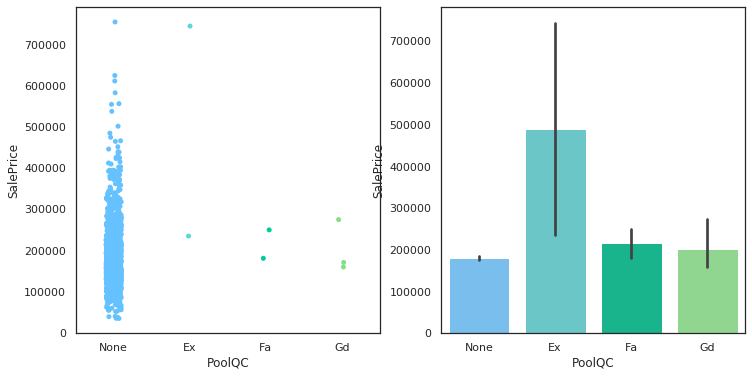

None    1453
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64

In [13]:
fill_none('PoolQC')
class_plt_feature('PoolQC')
train['PoolQC'].value_counts()

In [14]:
train = train.drop('PoolQC',axis=1)
test = test.drop('PoolQC',axis=1)

## MiscFeature

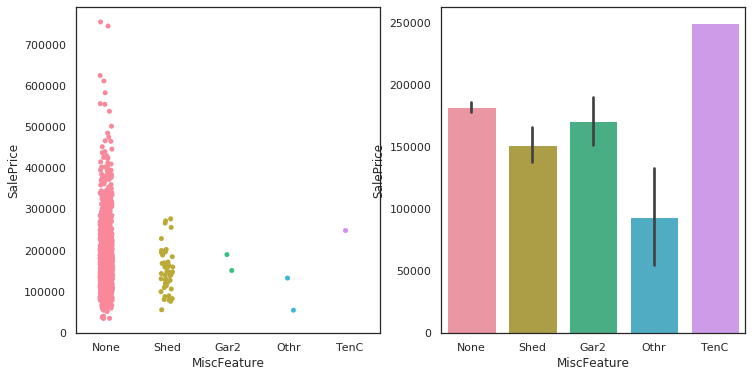

In [15]:
fill_none('MiscFeature')
class_plt_feature('MiscFeature')

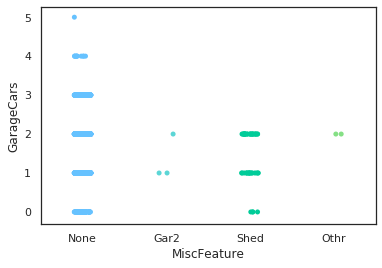

In [16]:
class_waiting_for_one_hot.append('MiscFeature')
sns.stripplot(x='MiscFeature', y='GarageCars', data=test, size = 5, jitter = True ,order=None)

In [17]:
train = train.drop(train[train['MiscFeature']=='TenC'].index)

## Alley

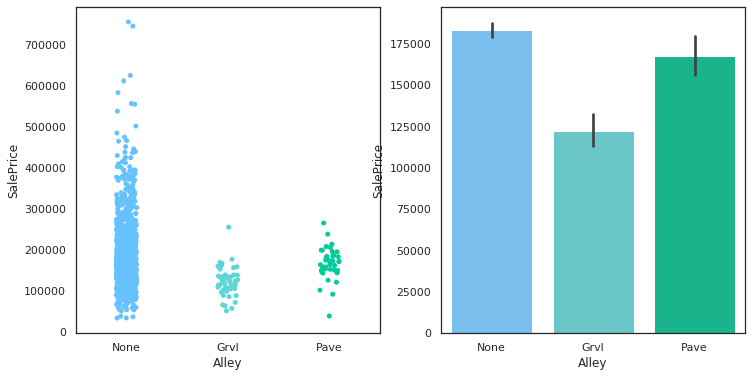

In [18]:
fill_none('Alley')
class_plt_feature('Alley')

In [19]:
# class_waiting_for_one_hot.append('Alley')
train['Alley'] = train['Alley'].map({"None":2,"Pave":1,"Grvl":0})
test['Alley'] = test['Alley'].map({"None":2,"Pave":1,"Grvl":0})

## Fence

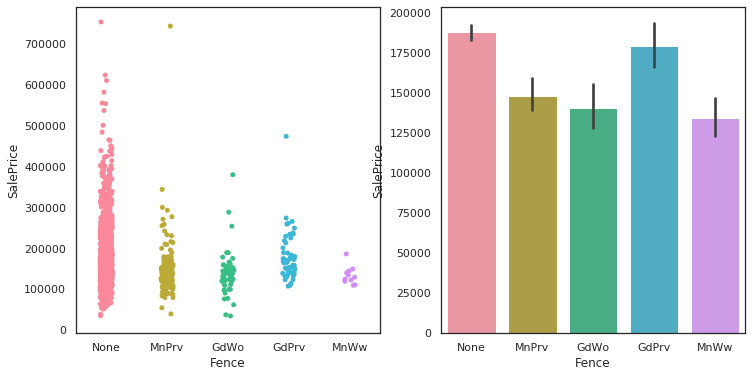

In [20]:
fill_none('Fence')
class_plt_feature('Fence')

In [21]:
# class_waiting_for_one_hot.append('Fence')
train['Fence'] = train['Fence'].map({"None":4,"GdPrv":3,"MnPrv":2,"GdWo":1,"MnWw":0})
test['Fence'] = test['Fence'].map({"None":4,"GdPrv":3,"MnPrv":2,"GdWo":1,"MnWw":0})

## FireplaceQu

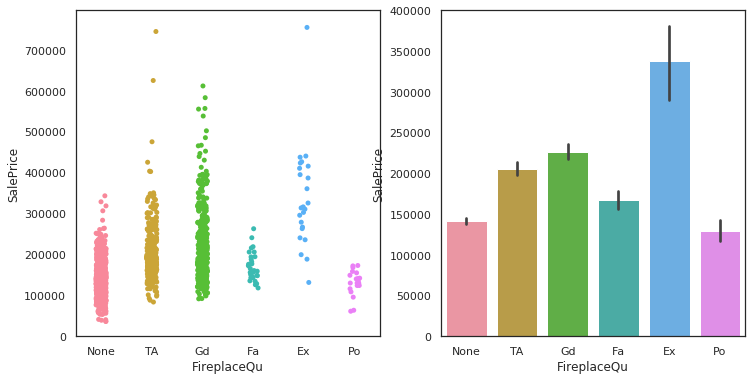

In [22]:
fill_none('FireplaceQu')
class_plt_feature('FireplaceQu')

In [23]:
train['FireplaceQu'] = train['FireplaceQu'].map({"Po":0,"None":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})
test['FireplaceQu'] = test['FireplaceQu'].map({"Po":0,"None":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})

## LotFrontage

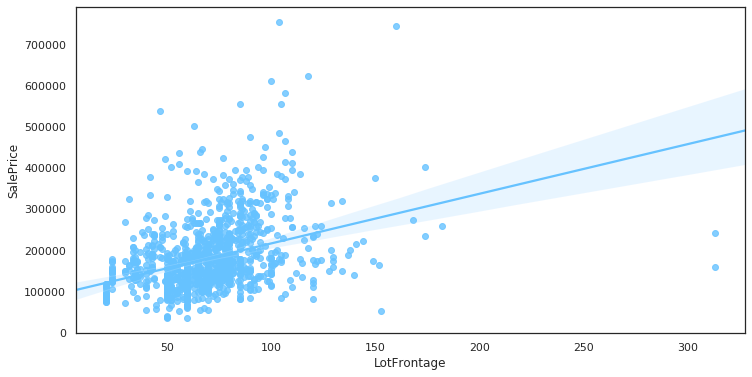

In [24]:
num_plt_feature('LotFrontage')

In [25]:
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
# train = train.drop(train[train['LotFrontage']>200].index)
# num_plt_feature('LotFrontage')

## GarageQual

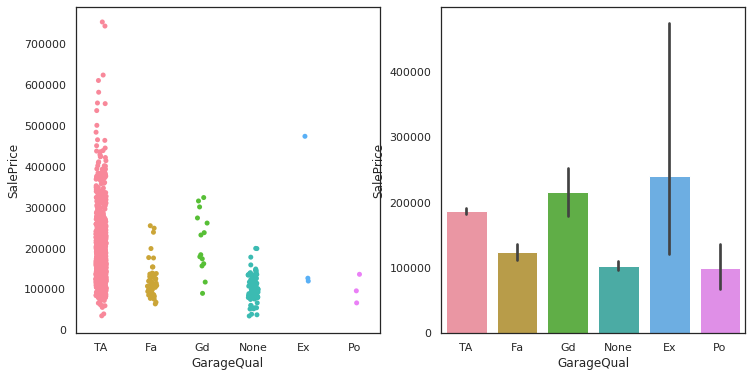

In [26]:
fill_none('GarageQual')
class_plt_feature('GarageQual')

In [27]:
train['GarageQual'] = train['GarageQual'].map({"Po":1,"None":0,"Ex":5,"Gd":4,"Fa":2,"TA":3})
test['GarageQual'] = test['GarageQual'].map({"Po":1,"None":0,"Ex":5,"Gd":4,"Fa":2,"TA":3})
# class_waiting_for_one_hot.append('GarageQual')

## GarageFinish

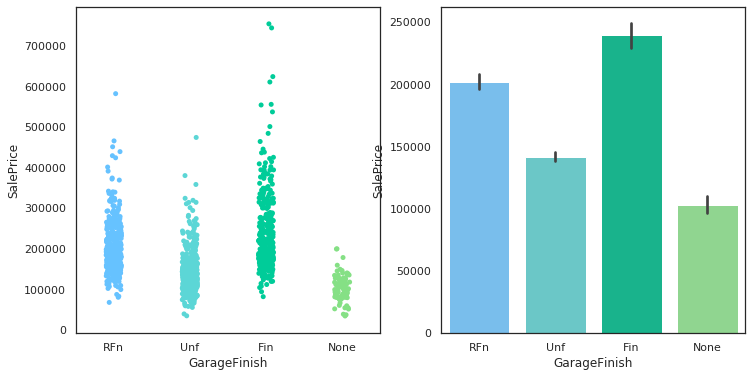

In [28]:
fill_none('GarageFinish')
class_plt_feature('GarageFinish')

In [29]:
train['GarageFinish'] = train['GarageFinish'].map({"Fin":3,"RFn":2,"Unf":1,"None":0})
test['GarageFinish'] = test['GarageFinish'].map({"Fin":3,"RFn":2,"Unf":1,"None":0})

## GarageCond

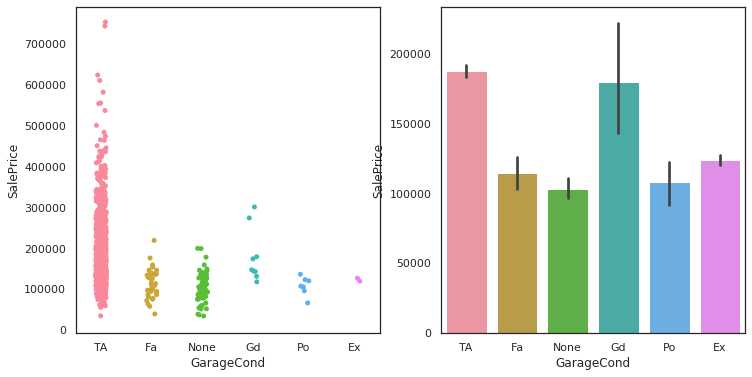

In [30]:
fill_none('GarageCond')
class_plt_feature('GarageCond')

In [31]:
train['GarageCond'] = train['GarageCond'].map({"TA":3,"Gd":4,"Fa":2,"None":0,"Po":1,"Ex":5})
test['GarageCond'] = test['GarageCond'].map({"TA":3,"Gd":4,"Fa":2,"None":0,"Po":1,"Ex":5})

## GarageType

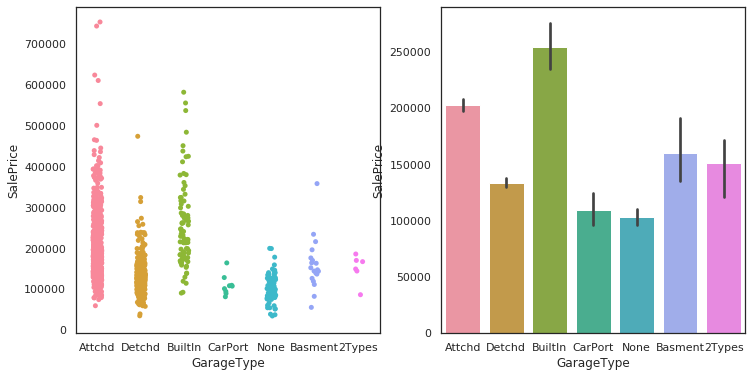

In [32]:
fill_none('GarageType')
class_plt_feature('GarageType')

In [33]:
# train['GarageType'] = train['GarageType'].map({"BuiltIn":3,"Attchd":2.5,"Basment":2,"2Types":1.8,"Detchd":1.6,"None":1,"CarPort":1.4})
# test['GarageType'] = test['GarageType'].map({"BuiltIn":3,"Attchd":2.5,"Basment":2,"2Types":1.8,"Detchd":1.6,"None":1,"CarPort":1.4})

## GarageYrBlt

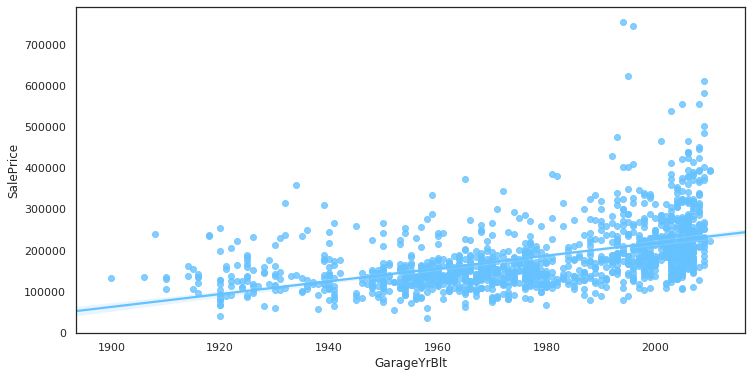

In [34]:
num_plt_feature('GarageYrBlt')

In [35]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(1890)
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(1890)

## BsmtCond

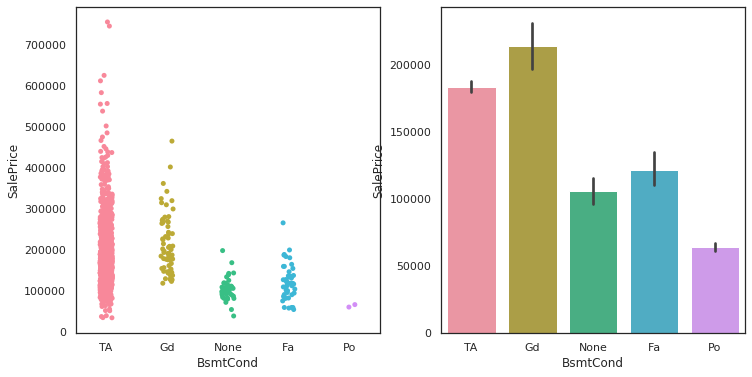

In [36]:
fill_none('BsmtCond')
class_plt_feature('BsmtCond')

In [37]:
train['BsmtCond'] = train['BsmtCond'].map({"Po":0,"None":1,"Fa":2,"Gd":4,"TA":3})
test['BsmtCond'] = test['BsmtCond'].map({"Po":0,"None":1,"Fa":2,"Gd":4,"TA":3})

## BsmtExposure

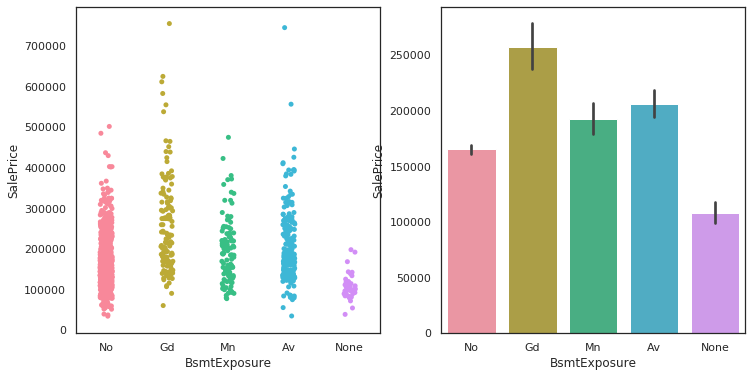

In [38]:
feature_name = 'BsmtExposure'
fill_none(feature_name)
class_plt_feature(feature_name)

In [39]:
train['BsmtExposure'] = train['BsmtExposure'].map({"None":0,"No":1,"Av":2,"Mn":3,"Gd":4})
test['BsmtExposure'] = test['BsmtExposure'].map({"None":0,"No":1,"Av":2,"Mn":3,"Gd":4})

## BsmtQual

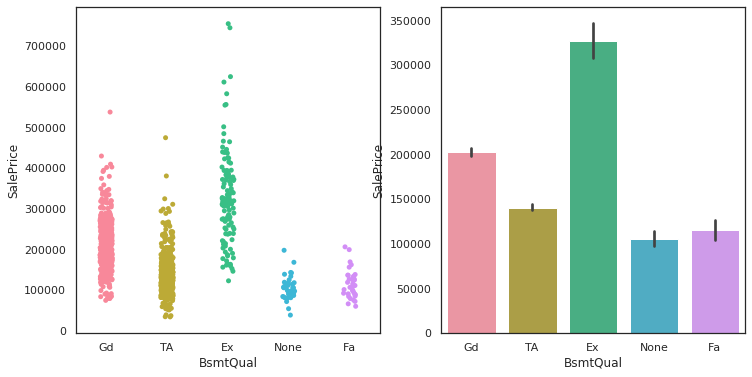

In [40]:
feature_name = 'BsmtQual'
fill_none(feature_name)
class_plt_feature(feature_name)

In [41]:
train[feature_name] = train[feature_name].map({"None":0,"Fa":1,"TA":2,"Gd":3,"Ex":4})
test[feature_name] = test[feature_name].map({"None":0,"Fa":1,"TA":2,"Gd":3,"Ex":4})

## BsmtFinType2

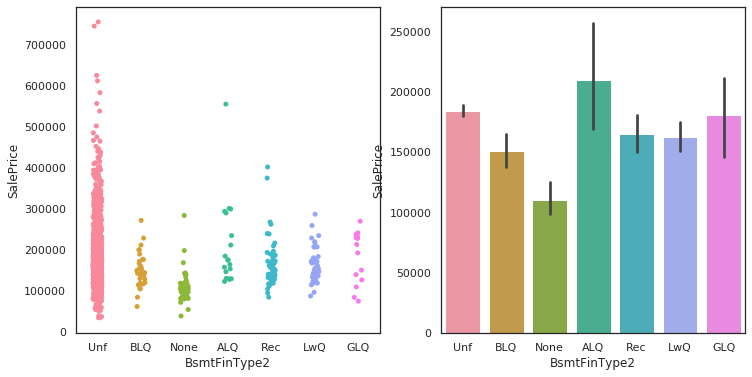

In [42]:
feature_name = 'BsmtFinType2'
fill_none(feature_name)
class_plt_feature(feature_name)

In [43]:
train[feature_name] = train[feature_name].map({"None":0,"BLQ":1,"GLQ":3,"LwQ":2,"Rec":2,"ALQ":5,"Unf":4})
test[feature_name] = test[feature_name].map({"None":0,"BLQ":1,"GLQ":3,"LwQ":2,"Rec":2,"ALQ":5,"Unf":4})
# class_waiting_for_one_hot.append(feature_name)

## BsmtFinType1

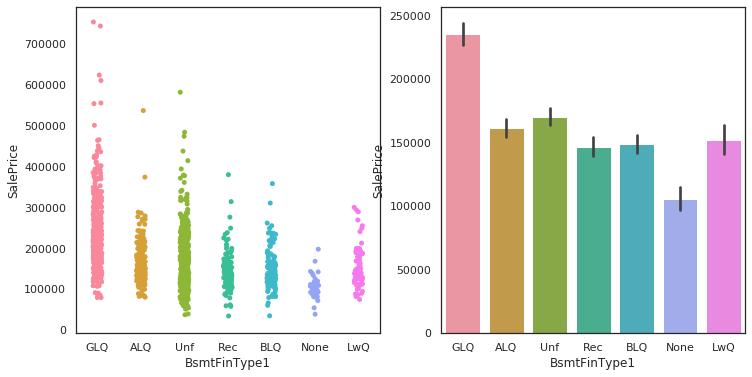

In [44]:
feature_name = 'BsmtFinType1'
fill_none(feature_name)
class_plt_feature(feature_name)

In [45]:
train[feature_name] = train[feature_name].map({"GLQ":4,"BLQ":1,"LwQ":1,"None":0,"Rec":1,"Unf":3,"ALQ":2})
test[feature_name] = test[feature_name].map({"GLQ":4,"BLQ":1,"LwQ":1,"None":0,"Rec":1,"Unf":3,"ALQ":2})
# class_waiting_for_one_hot.append(feature_name)

## MasVnrType

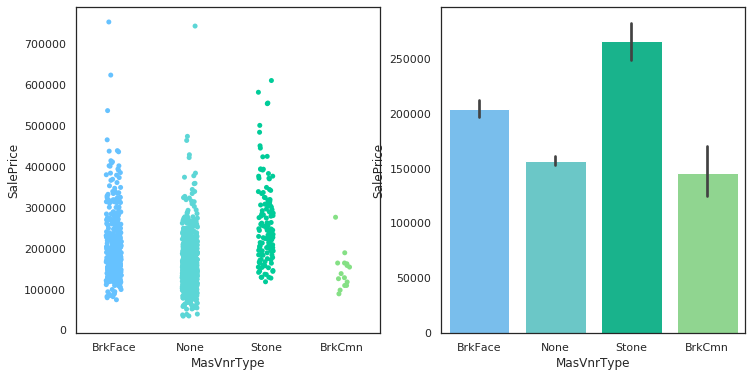

In [46]:
feature_name = 'MasVnrType'
fill_none(feature_name)
class_plt_feature(feature_name)

In [47]:
# train[feature_name] = train[feature_name].map({"BrkCmn":0.5,"None":1,"BrkFace":1.5,"Stone":2})
# test[feature_name] = test[feature_name].map({"BrkCmn":0.5,"None":1,"BrkFace":1.5,"Stone":2})

## MasVnrArea

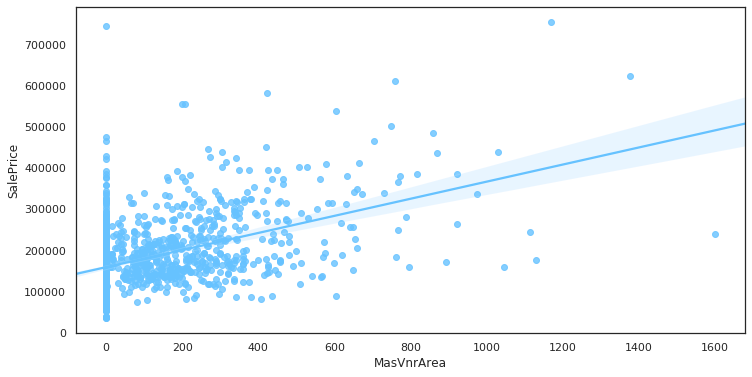

In [48]:
feature_name = 'MasVnrArea'
fill_zero(feature_name)
num_plt_feature(feature_name)

In [49]:
# train = train.drop(train[train[feature_name]>1500].index)

## MSZoning

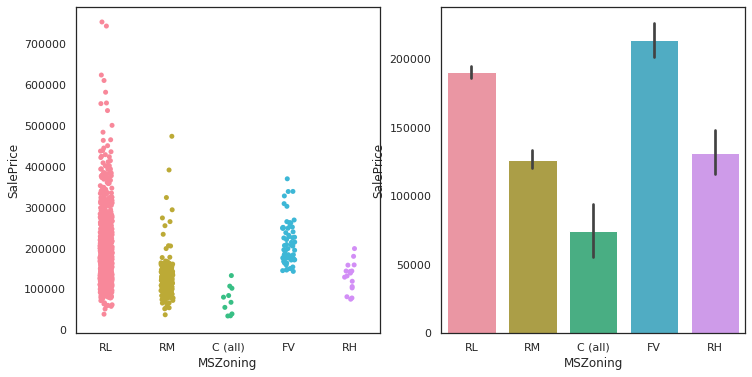

In [50]:
feature_name = 'MSZoning'
fill_mode(feature_name)
class_plt_feature(feature_name)

In [51]:
# train[feature_name] = train[feature_name].map({"C":1,"RM":2,"RH":2.5,"RL":3,"FV":3.5})
# test[feature_name] = test[feature_name].map({"C":1,"RM":2,"RH":2.5,"RL":3,"FV":3.5})
class_waiting_for_one_hot.append(feature_name)

## BsmtFullBath	

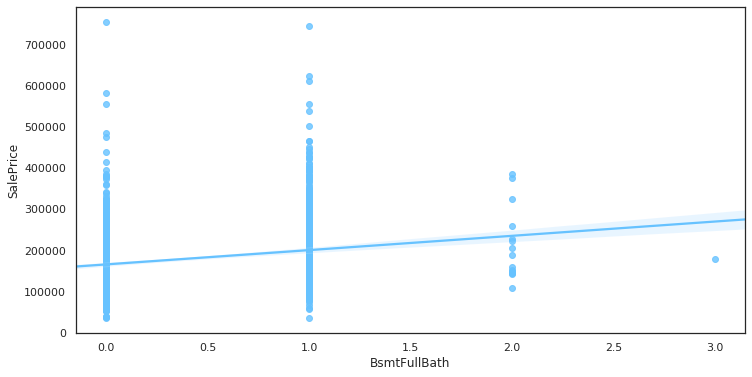

In [52]:
feature_name = 'BsmtFullBath'
fill_mode(feature_name)
num_plt_feature(feature_name)

## BsmtHalfBath

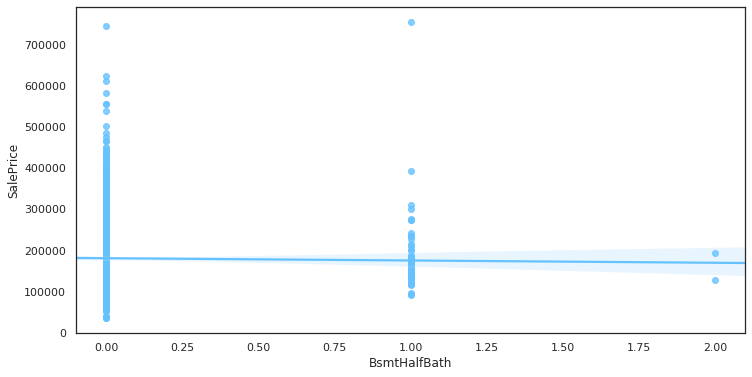

In [53]:
feature_name = 'BsmtHalfBath'
fill_mode(feature_name)
num_plt_feature(feature_name)

## Utilities

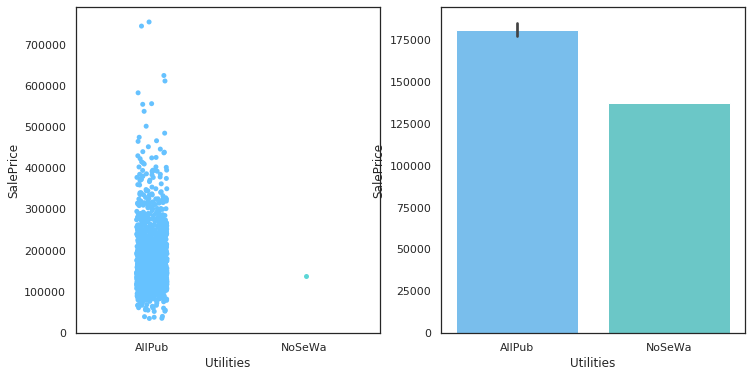

In [54]:
feature_name = 'Utilities'
class_plt_feature(feature_name)

In [55]:
train = train.drop([feature_name],axis=1)
test = test.drop([feature_name],axis=1)

## Functional

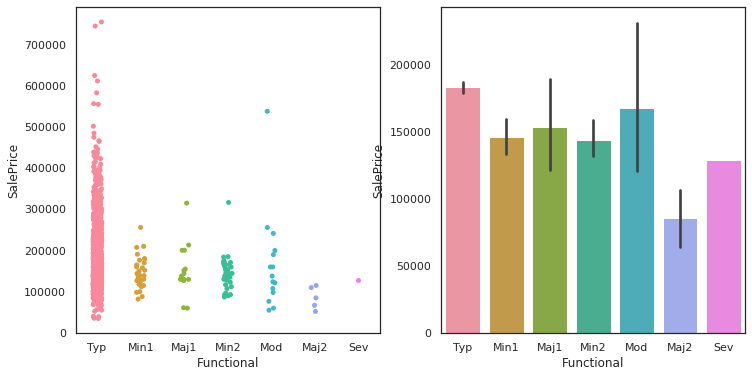

In [56]:
feature_name = 'Functional'
fill_mode(feature_name)
class_plt_feature(feature_name)

In [57]:
train[feature_name] = train[feature_name].map({"Maj2":1,"Sev":2,"Min1":3,"Maj1":3,"Min2":3,"Mod":3.5,"Typ":4})
test[feature_name] = test[feature_name].map({"Maj2":1,"Sev":2,"Min1":3,"Maj1":3,"Min2":3,"Mod":3.5,"Typ":4})

## Electrical

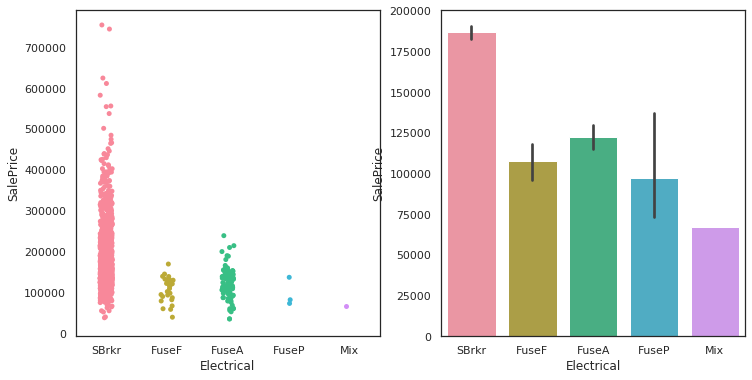

In [58]:
feature_name = 'Electrical'
fill_mode(feature_name)
class_plt_feature(feature_name)

In [59]:
# train[feature_name] = train[feature_name].map({"SBrkr":4,"FuseA":3,"FuseF":2,"FuseP":1,"Mix":0})
# test[feature_name] = test[feature_name].map({"SBrkr":4,"FuseA":3,"FuseF":2,"FuseP":1,"Mix":0})

## BsmtUnfSF

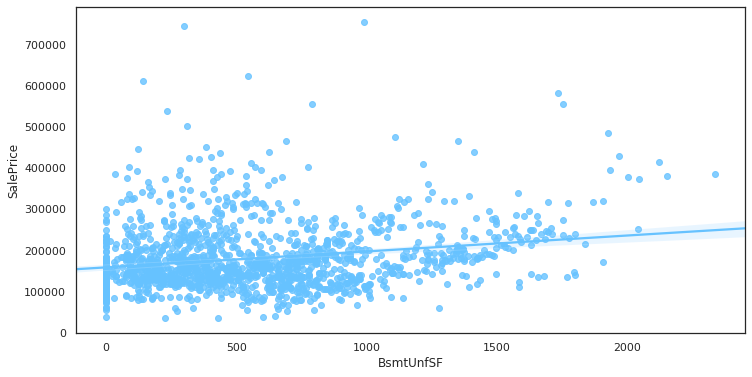

In [60]:
feature_name = 'BsmtUnfSF'
fill_mode(feature_name)
num_plt_feature(feature_name)

## Exterior1st

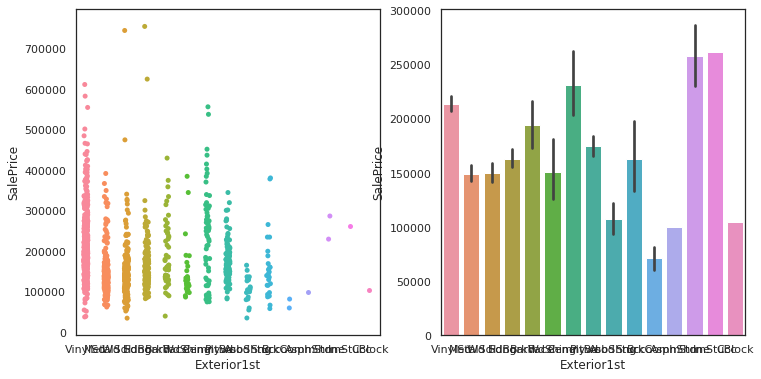

In [61]:
feature_name = 'Exterior1st'
fill_mode(feature_name)
class_plt_feature(feature_name)

In [62]:
class_waiting_for_one_hot.append(feature_name)

## Exterior2nd

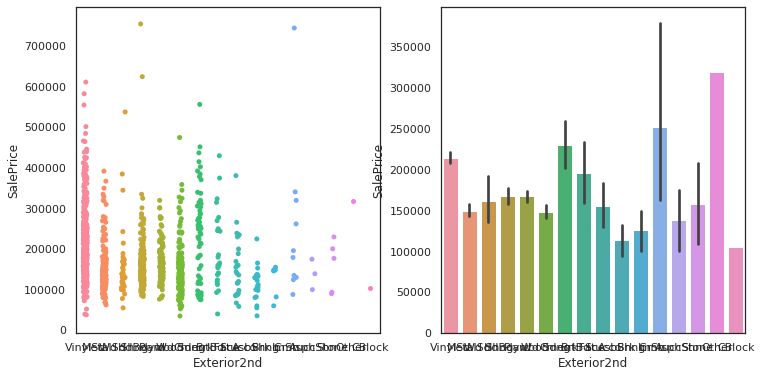

In [63]:
feature_name = 'Exterior2nd'
fill_mode(feature_name)
class_plt_feature(feature_name)

In [64]:
class_waiting_for_one_hot.append(feature_name)

## TotalBsmtSF

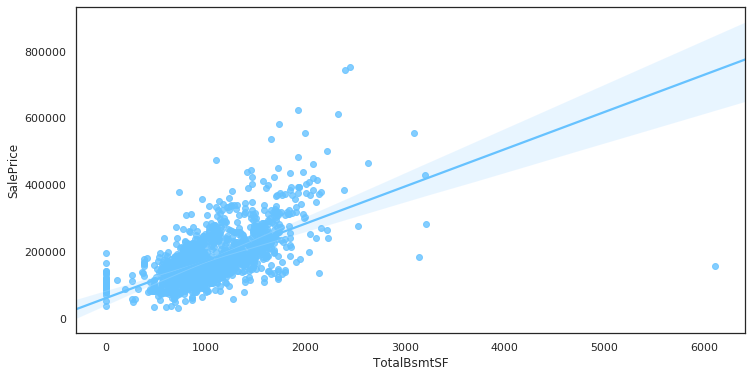

In [65]:
feature_name = 'TotalBsmtSF'
fill_mode(feature_name)
num_plt_feature(feature_name)

In [66]:
# train = train.drop(train[train[feature_name]>3000].index)

## GarageArea

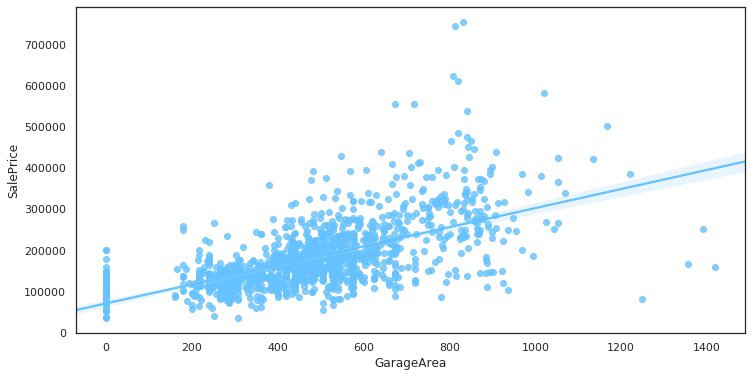

In [67]:
feature_name = 'GarageArea'
fill_zero(feature_name)
num_plt_feature(feature_name)

In [68]:
# train = train.drop(train[train[feature_name]>1200].index)

## GarageCars

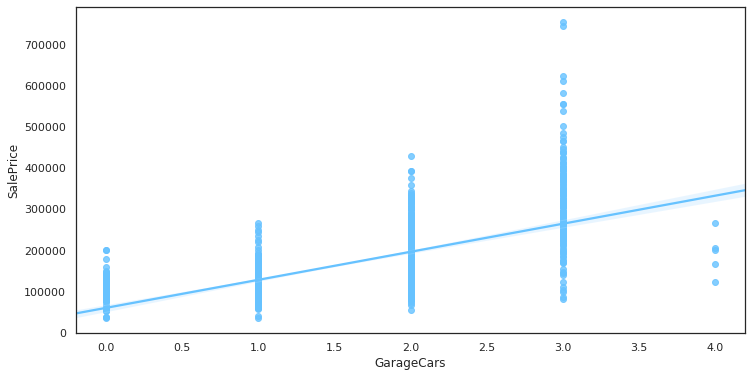

In [69]:
feature_name = 'GarageCars'
fill_zero(feature_name)
num_plt_feature(feature_name)

In [70]:
# train = train.drop(train[train['GarageCars']==4].index)

## BsmtFinSF2

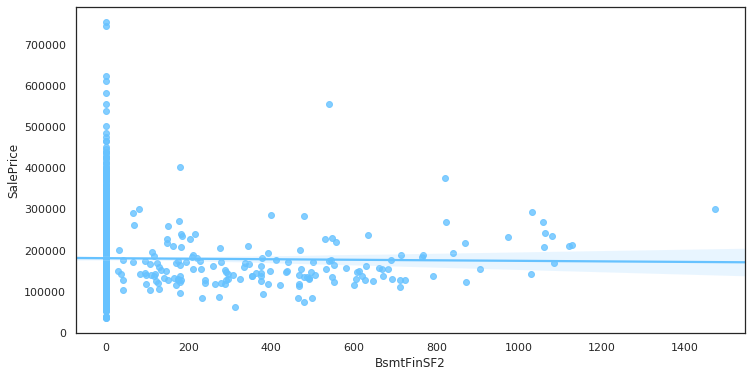

In [71]:
feature_name = 'BsmtFinSF2'
fill_mode(feature_name)
num_plt_feature(feature_name)

In [72]:
train = train.drop([feature_name],axis=1)
test = test.drop([feature_name],axis=1)

## KitchenQual

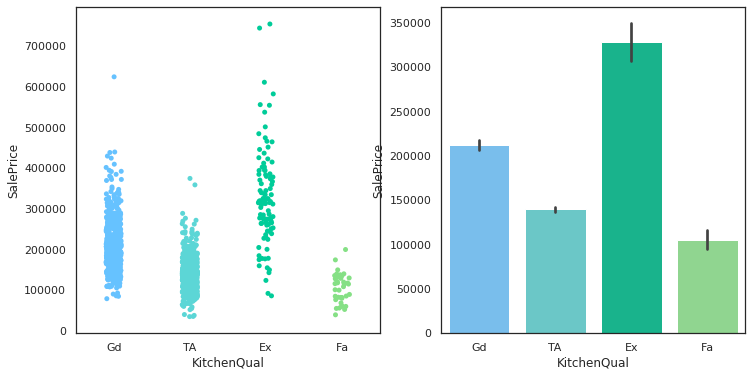

In [73]:
feature_name = 'KitchenQual'
fill_mode(feature_name)
class_plt_feature(feature_name)

In [74]:
train[feature_name] = train[feature_name].map({"Ex":3,"Gd":2,"TA":1,"Fa":0})
test[feature_name] = test[feature_name].map({"Ex":3,"Gd":2,"TA":1,"Fa":0})

## BsmtFinSF1

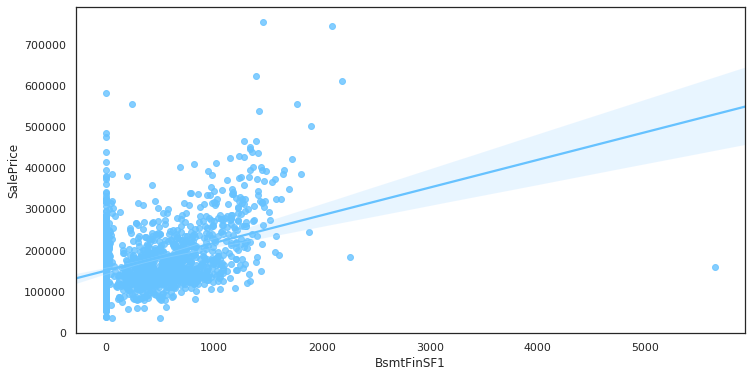

In [75]:
feature_name='BsmtFinSF1'
fill_mode(feature_name)
num_plt_feature(feature_name)

In [76]:
train = train.drop(train[train['BsmtFinSF1']>2000].index)

## SaleType

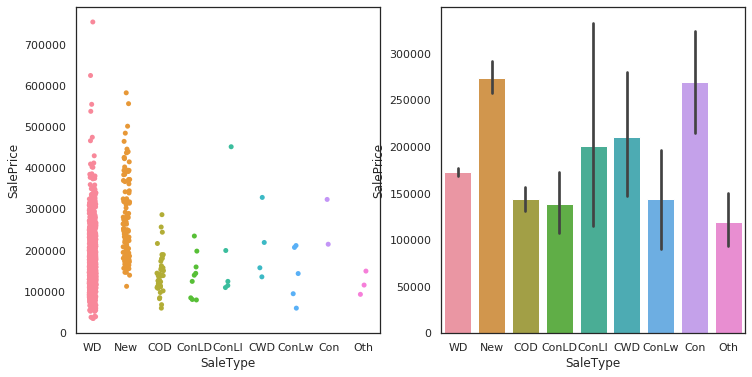

In [77]:
feature_name = 'SaleType'
fill_mode(feature_name)
class_plt_feature(feature_name)

In [78]:
class_waiting_for_one_hot.append(feature_name)

## GrLivArea

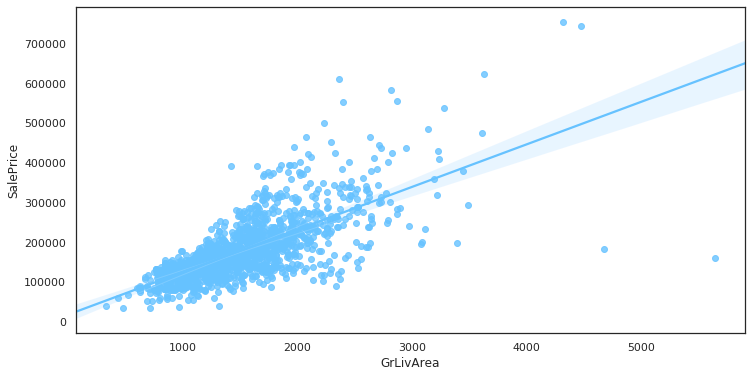

In [14]:
num_plt_feature('GrLivArea')

In [80]:
# 基本呈线性关系，下面去掉价格小于10.8和x轴大于4500的噪声点

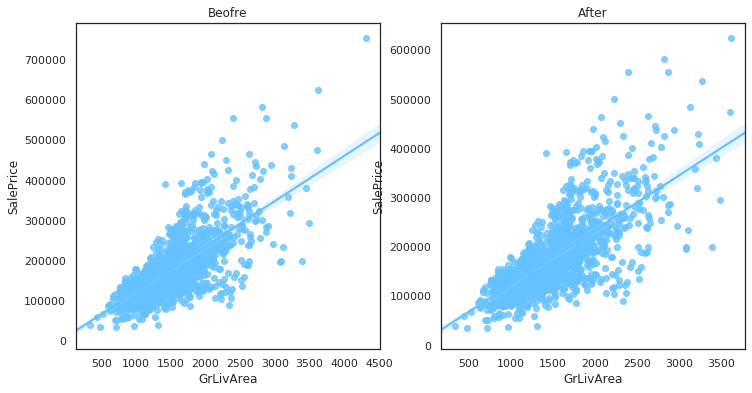

In [81]:
plt.subplots(figsize=(12,6))  # 设定画布大小
plt.subplot(1,2,1)  # 图片的排列方式1行2列的第一张图
g= sns.regplot(x=train['GrLivArea'],y= train['SalePrice'],fit_reg=True).set_title('Beofre')  
plt.subplot(1,2,2)  # 图片的排列方式1行2列的第二张图
train= train.drop(train[train['GrLivArea']>4000].index)  # 去掉面积大于4000的样本，axis=0 默认人参数
# train= train.drop(train[train['GrLivArea']>4500].index)  # 去掉面积大于4500的样本，axis=0 默认人参数
# train= train.drop(train[train['SalePrice']<10.8].index)  # 去掉价格低于10.8的样本
g=sns.regplot(x=train['GrLivArea'],y=train['SalePrice'],fit_reg=True).set_title('After')  

## MSSubClass

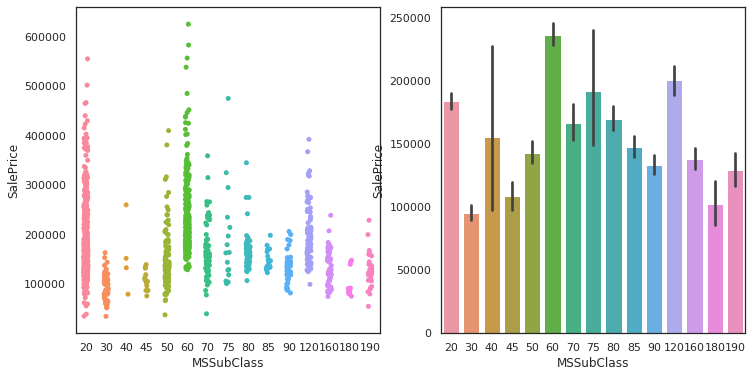

In [82]:
class_plt_feature('MSSubClass')

In [83]:
# 这一项是待售房的类型，看起来与价格没什么线性关系，所以用one-hot编码
class_waiting_for_one_hot.append('MSSubClass')

## LotArea

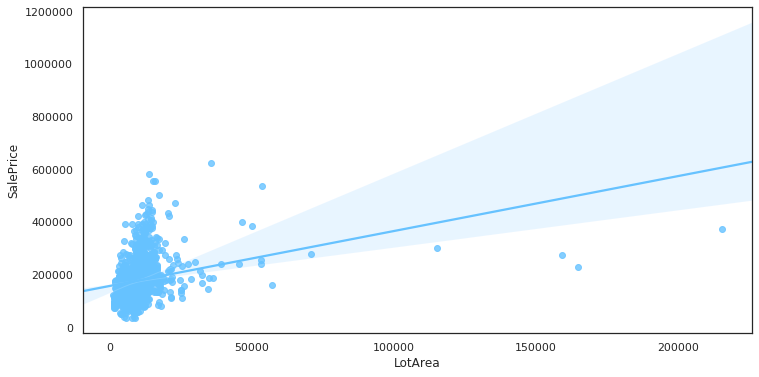

In [84]:
num_plt_feature('LotArea')

## Street

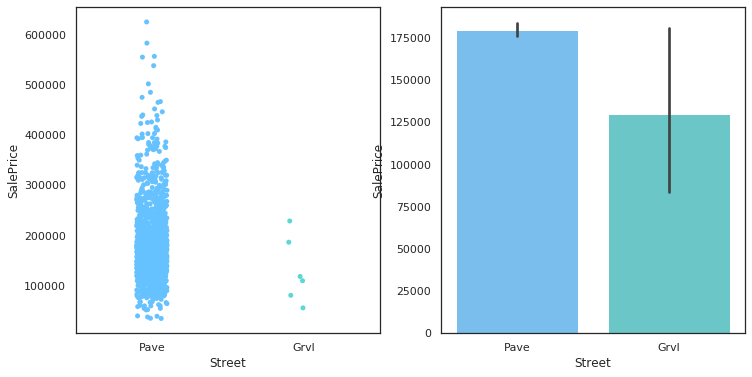

In [85]:
class_plt_feature('Street')

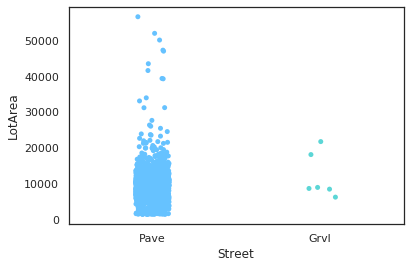

In [86]:
sns.stripplot(x='Street', y='LotArea', data=test, size = 5, jitter = True ,order=None)

In [87]:
train = train.drop('Street',axis=1)
test = test.drop('Street',axis=1)

## LotShape

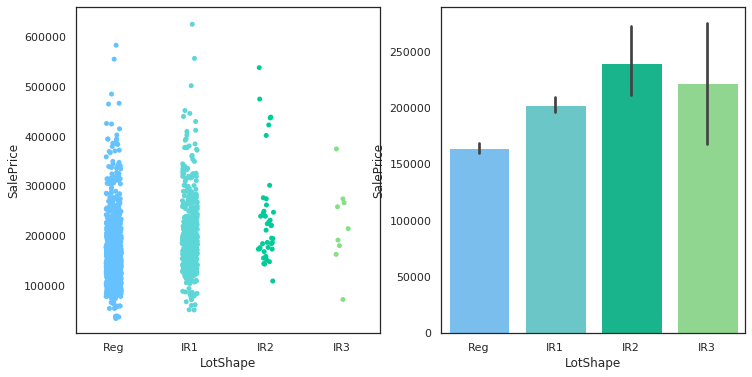

In [88]:
class_plt_feature('LotShape')

In [89]:
# class_waiting_for_one_hot.append('LotShape')
train['LotShape'] = train['LotShape'].map({"Reg":0,"IR1":1,"IR3":2,"IR2":3})
test['LotShape'] = test['LotShape'].map({"Reg":0,"IR1":1,"IR3":2,"IR2":3})

## LandContour

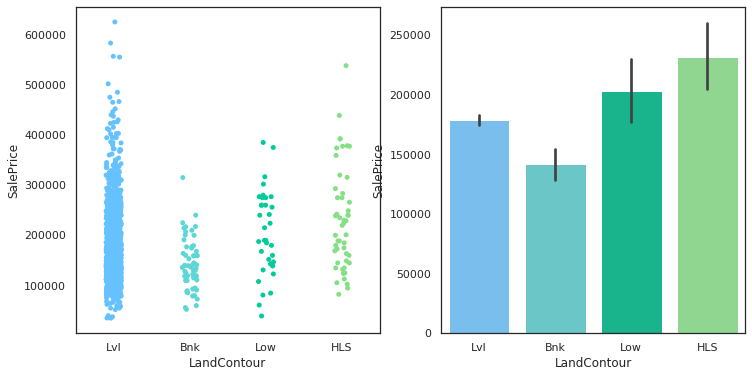

In [90]:
class_plt_feature('LandContour')

In [91]:
train['LandContour'] = train['LandContour'].map({"Bnk":0,"Lvl":1,"Low":2,"HLS":3})
test['LandContour'] = test['LandContour'].map({"Bnk":0,"Lvl":1,"Low":2,"HLS":3})

## ExterQual

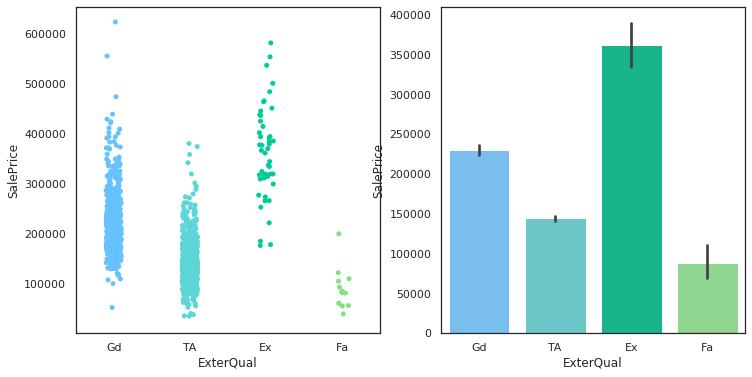

In [92]:
class_plt_feature('ExterQual')

In [93]:
train['ExterQual'] = train['ExterQual'].map({"Fa":0,"TA":1,"Gd":2,"Ex":3})
test['ExterQual'] = test['ExterQual'].map({"Fa":0,"TA":1,"Gd":2,"Ex":3})

## ExterCond

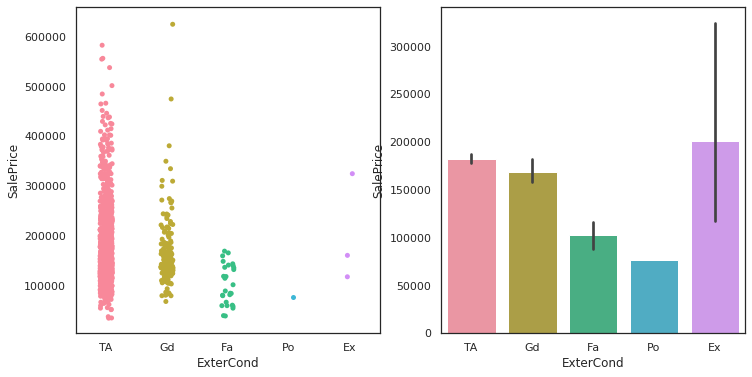

In [94]:
class_plt_feature('ExterCond')

In [95]:
train['ExterCond'] = train['ExterCond'].map({"Ex":4,"Po":0,"Fa":1,"Gd":2,"TA":3})
test['ExterCond'] = test['ExterCond'].map({"Ex":4,"Po":0,"Fa":1,"Gd":2,"TA":3})

## HeatingQC

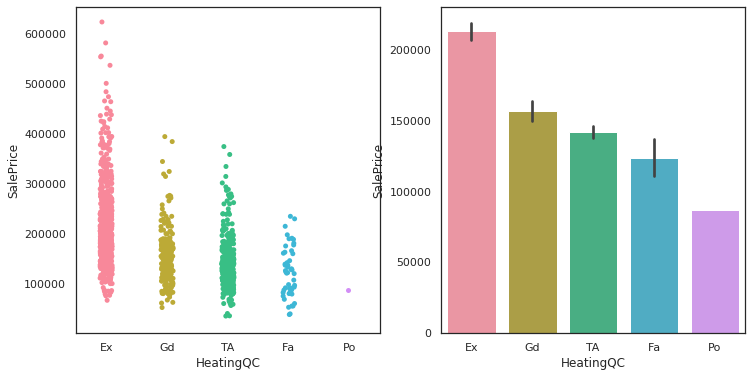

In [96]:
class_plt_feature('HeatingQC')

In [97]:
train['HeatingQC'] = train['HeatingQC'].map({"Ex":4,"Gd":3,"TA":2,"Fa":1,"Po":0})
test['HeatingQC'] = test['HeatingQC'].map({"Ex":4,"Gd":3,"TA":2,"Fa":1,"Po":0})

## LandSlope

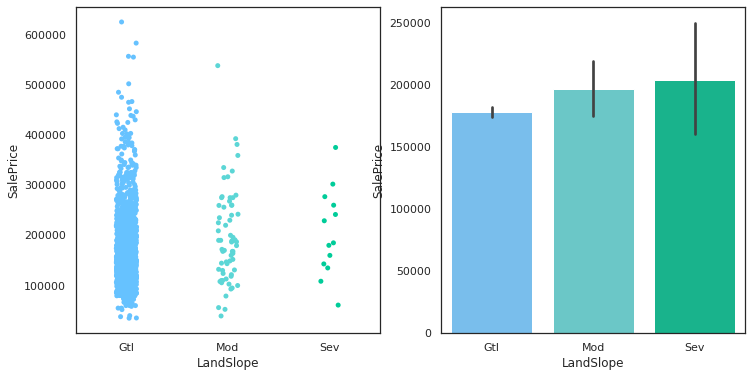

In [98]:
class_plt_feature('LandSlope')

In [99]:
train['LandSlope'] = train['LandSlope'].map({"Sev":2,"Mod":1,"Gtl":0})
test['LandSlope'] = test['LandSlope'].map({"Sev":2,"Mod":1,"Gtl":0})

## PavedDrive

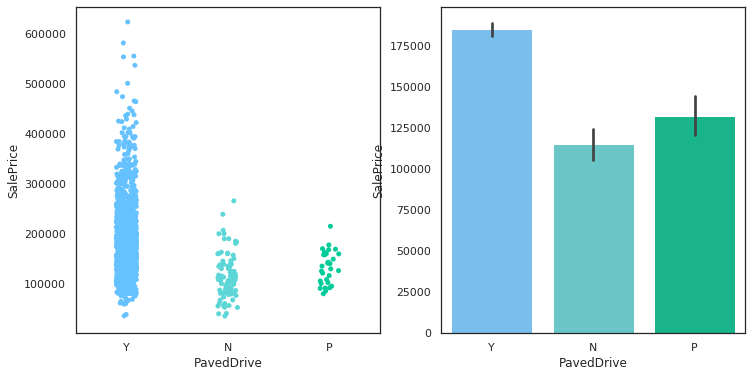

In [100]:
class_plt_feature('PavedDrive')

In [101]:
train['PavedDrive'] = train['PavedDrive'].map({"N":0,"P":1,"Y":2})
test['PavedDrive'] = test['PavedDrive'].map({"N":0,"P":1,"Y":2})

## CentralAir

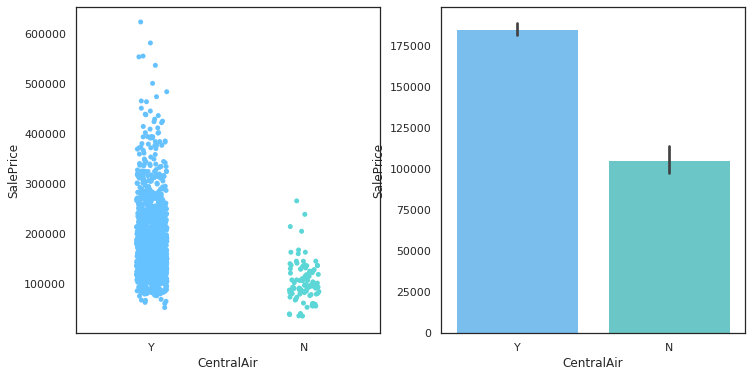

In [102]:
class_plt_feature('CentralAir')

In [103]:
train['CentralAir'] = train['CentralAir'].map({"Y":1,"N":0})
test['CentralAir'] = test['CentralAir'].map({"Y":1,"N":0})

## OverallCond

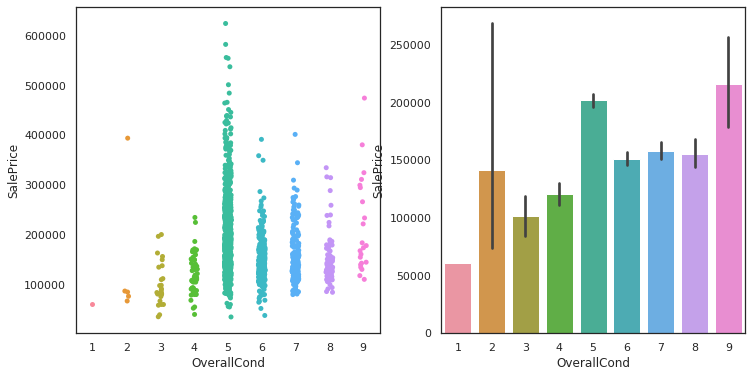

In [104]:
class_plt_feature('OverallCond')

In [105]:
# train['OverallCond'] = train['OverallCond'].map({1:1,2:2,3:3,4:4,6:5,8:6,7:7,"5":8,9:9})
# test['OverallCond'] = test['OverallCond'].map({"1":1,"2":2,"3":3,"4":4,"6":5,"8":6,"7":7,"5":8,"9":9})
class_waiting_for_one_hot.append('OverallCond')

## YrSold

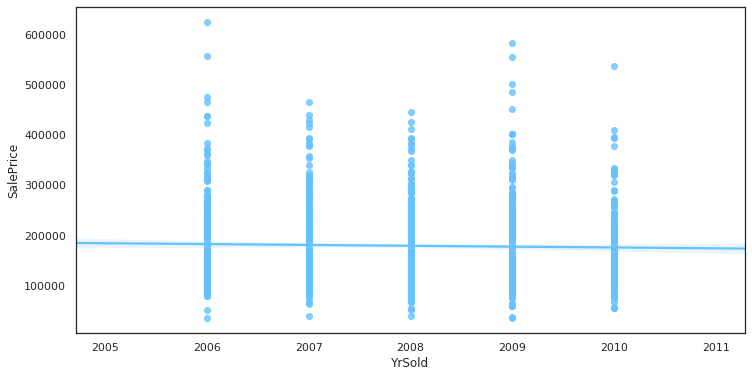

In [106]:
num_plt_feature('YrSold')

## MoSold

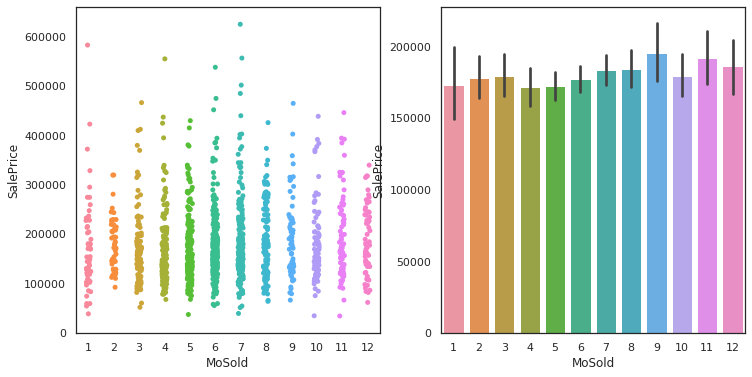

In [107]:
class_plt_feature('MoSold')

## BldgType

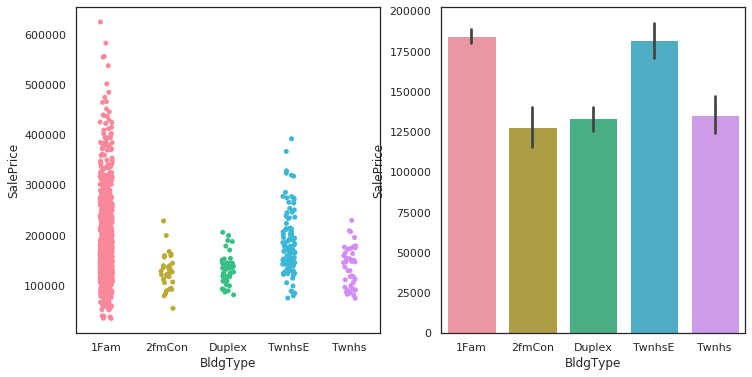

In [108]:
class_plt_feature('BldgType')

In [109]:
class_waiting_for_one_hot.append('BldgType')

## HouseStyle

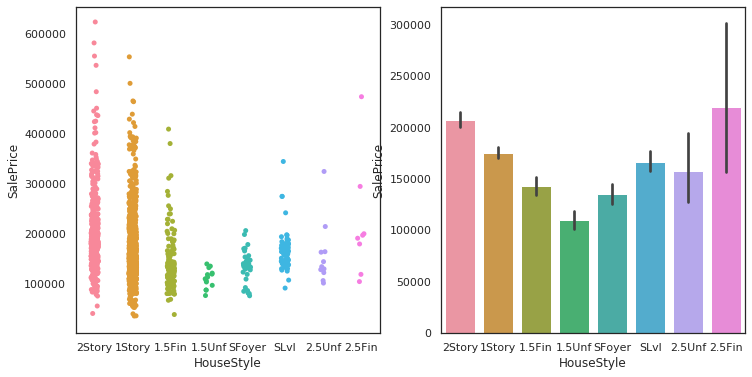

In [110]:
class_plt_feature('HouseStyle')

## 1stFirSF

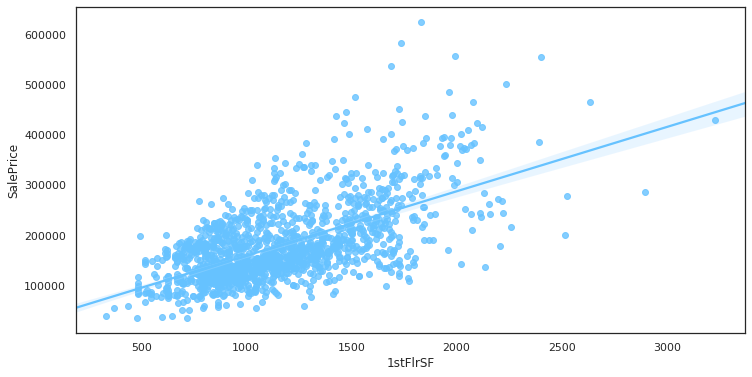

In [111]:
num_plt_feature('1stFlrSF')

In [112]:
train = train.drop(train[train['1stFlrSF']>4000].index)

## TotalBsmtSF

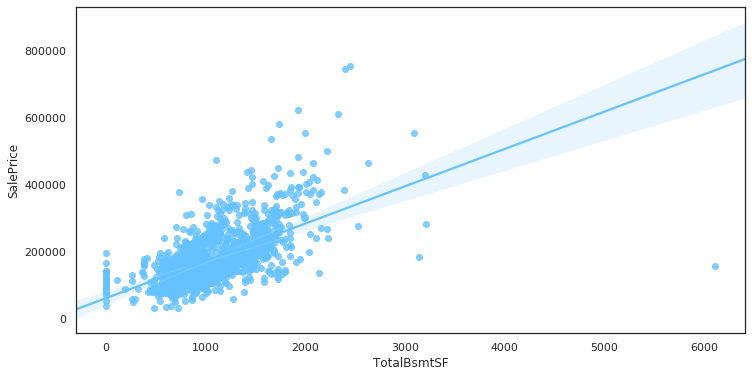

In [173]:
num_plt_feature('TotalBsmtSF')

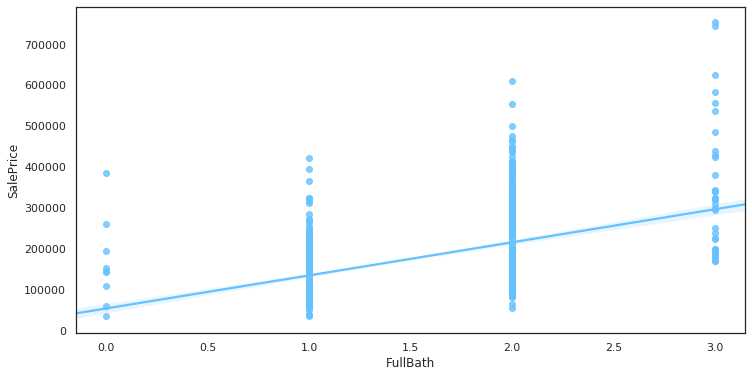

In [174]:
num_plt_feature('FullBath')

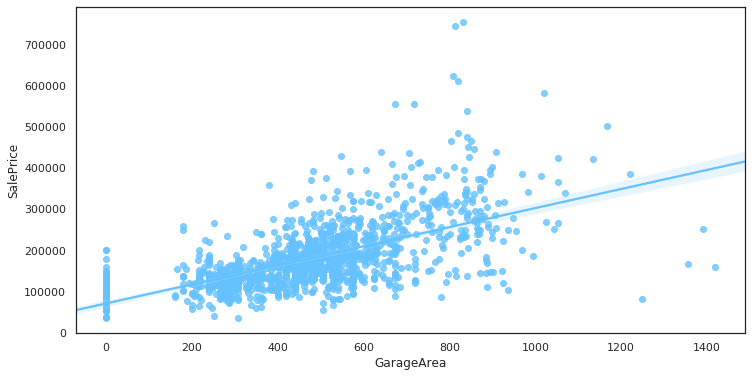

In [175]:
num_plt_feature('GarageArea')

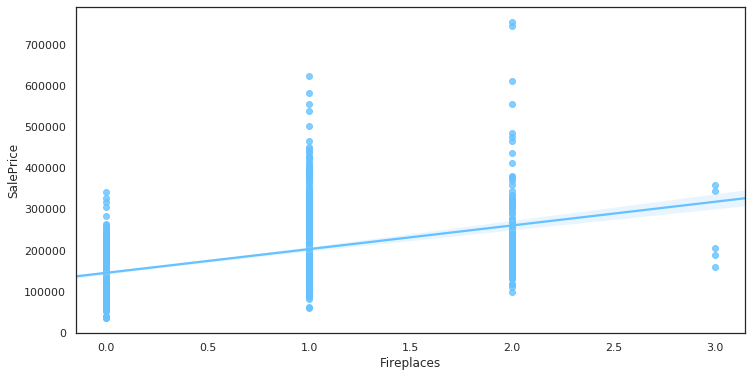

In [177]:
num_plt_feature('Fireplaces')

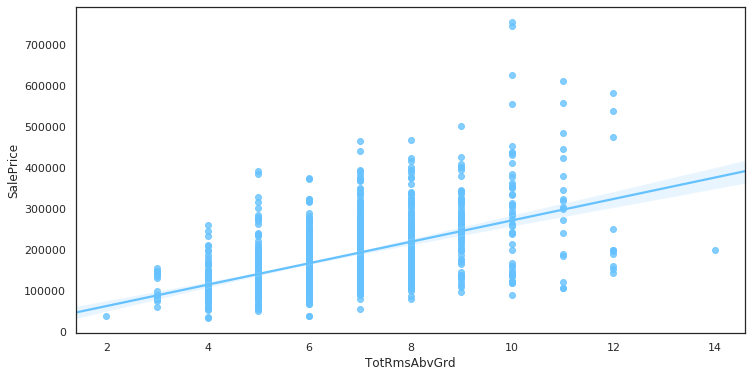

In [178]:
num_plt_feature('TotRmsAbvGrd')

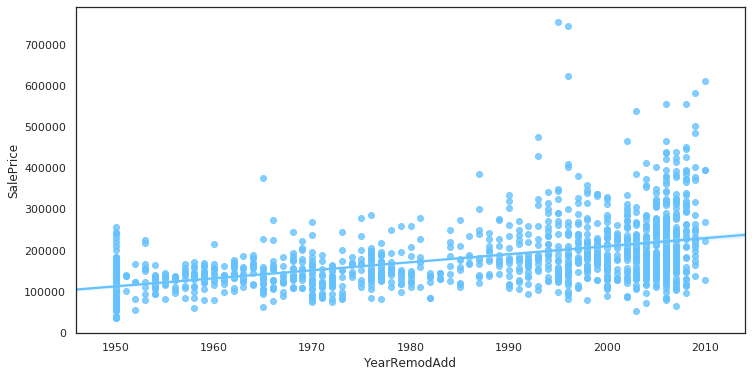

In [179]:
num_plt_feature('YearRemodAdd')

In [113]:

# train= train.drop(train[train['GrLivArea']>4000].index)


ntrain = train.shape[0]
ntest = test.shape[0]
train["SalePrice"] = np.log1p(train["SalePrice"])
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

# cols = (  
#          'HeatingQC',  
#             'LandSlope',
#          'PavedDrive', 'CentralAir', 'MSSubClass', 'OverallCond', 
#         'YrSold', 'MoSold')
# for c in cols:
#     lbl = LabelEncoder() 
# #     if(all_data[c].dtypes == "object"):
#     lbl.fit(list(all_data[c].values)) 
#     all_data[c] = lbl.transform(list(all_data[c].values))

all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(len(missing_data))

all_data size is : (2913, 75)


,Missing Ratio


In [114]:
# for col in ('PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType','MSSubClass'):
#     all_data[col] = all_data[col].fillna('None')

In [115]:
# all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
#     lambda x: x.fillna(x.median()))


In [116]:
# for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea'):
#     all_data[col] = all_data[col].fillna(0)
    

In [117]:
# for col in('MSZoning','KitchenQual','Electrical','Exterior1st','Exterior2nd','SaleType'):
#     all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

In [118]:
# plt.subplots(figsize=(12,5))
# plt.subplot(1,2,1)
# g=sns.countplot(x='Utilities',data=train).set_title('Utilities_train')
# plt.subplot(1,2,2)
# g=sns.countplot(x='Utilities',data=test).set_title('Utilities_test')

In [119]:
# all_data = all_data.drop(['Utilities'], axis=1)

In [120]:
# all_data["Functional"] = all_data["Functional"].fillna("Typ")


In [121]:
# Check remaining missing values if any 
# all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
# all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
# missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
# missing_data.head()

In [122]:
# ntrain = train.shape[0]
# ntest = test.shape[0]
# train["SalePrice"] = np.log1p(train["SalePrice"])
# y_train = train.SalePrice.values
# all_data = pd.concat((train, test)).reset_index(drop=True)
# all_data.drop(['SalePrice'], axis=1, inplace=True)
# print("all_data size is : {}".format(all_data.shape))

#### 类别特征处理-label转化

In [123]:
from sklearn.preprocessing import LabelEncoder
# cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
#         'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
#         'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
#         'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
#         'YrSold', 'MoSold')
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# cols = ( 
#         'ExterQual', 'ExterCond','HeatingQC', 
#         'LandSlope',
#          'PavedDrive',  'CentralAir', 'OverallCond', 
#         'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    if(all_data[c].dtypes=="object"):
        print(c+"\n")
        lbl = LabelEncoder() 
        lbl.fit(list(all_data[c].values)) 
        all_data[c] = lbl.transform(list(all_data[c].values))
        
lbl = LabelEncoder()
lbl.fit(list(all_data['MSSubClass'].values))
all_data['MSSubClass'] = lbl.transform(list(all_data['MSSubClass'].values))

# shape        
# print('Shape all_data: {}'.format(all_data.shape))

In [124]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

#### box-cox转换

In [125]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)


Skew in numerical features: 



,Skew
MiscVal,22.048
PoolArea,19.845
LotArea,13.126
LowQualFinSF,12.076
3SsnPorch,11.364
LandSlope,4.969
KitchenAbvGr,4.297
EnclosedPorch,3.999
BsmtHalfBath,3.941
ScreenPorch,3.917


In [126]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} highly skewed numerical features to Box Cox transform".format(skewness.shape[0]))

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
# all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 57 highly skewed numerical features to Box Cox transform


In [127]:
new_skew = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :new_skew})
skewness.head(20)

,Skew
PoolArea,17.328
3SsnPorch,8.915
LowQualFinSF,8.735
MiscVal,5.626
LandSlope,4.527
BsmtHalfBath,3.797
KitchenAbvGr,3.694
ScreenPorch,2.981
EnclosedPorch,2.022
LotShape,1.044


#### one-hot categoy 特征

In [128]:

# for oh in class_waiting_for_one_hot:
# all_data = pd.get_dummies(all_data,columns=class_waiting_for_one_hot)
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2913, 213)


In [129]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=150)
# all_data = pca.fit_transform(all_data)
# # print(pca.explained_variance_ratio_)
# print(all_data.shape)

In [130]:
train = all_data[:ntrain]
test = all_data[ntrain:]

### 模型部门

In [131]:
from sklearn.metrics import mean_squared_error

In [132]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    # kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    # rmse= np.sqrt(-cross_val_score(model, train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

#### 基模型

**LASSO Regression**

**This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline**
**这个模型对于异常值非常敏感，需要使用Robustscaler方法**

In [133]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
# alpha参数怎么定的？这里面都是需要使用调参数进行解决的

In [134]:
###Elastic Net Regression，同样是针对异常值处理的一个模型
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [135]:
###Kernel Ridge Regression :

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [136]:
###Gradient Boosting Regression :
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [137]:
###XGBoost :
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)



In [138]:
####LightGBM :
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [139]:
###KNN :
from sklearn.neighbors import KNeighborsRegressor

# x = train.values
# y = y_train
# k_range = range(1, 31)
# k_error = []
# for k in k_range:
#     knn = KNeighborsRegressor(n_neighbors=k,weights='distance',algorithm='brute')
#     scores = rmsle_cv(knn)
#     k_error.append(scores.mean())

# plt.plot(k_range, k_error)
# plt.xlabel('Value of K for KNN')
# plt.ylabel('Error')
# plt.show()

In [140]:
model_knn = KNeighborsRegressor(n_neighbors=6,weights='distance',algorithm='auto')

#### 模型初步评估

In [141]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

# nntrain = int(ntrain *4 /5)
# new_train = all_data[:nntrain]
# ny_train = y_train[:nntrain]
# nnew_test = all_data[nntrain:ntrain]
# ny_test = y_train[nntrain:]
# lasso.fit(new_train.values,ny_train)
# pre_lasso_pred = lasso.predict(nnew_test.values)
# lasso_sub = pre_lasso_pred - ny_test

# #Check the new distribution 
# sns.distplot(lasso_sub , fit=norm);
# mu, sigma, = norm.fit(lasso_sub)  # 均值，标准差
# # skew_co  =lasso_sub.skew() # 偏态系数

# #Now plot the distribution
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} ) skew{:.2f}'.format(mu, sigma,skew_co)],
#             loc='best')
# fig = plt.figure()
# plt.show()


Lasso score: 0.1130 (0.0055)



In [142]:
# score = rmsle_cv(ENet)
# print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

# ENet.fit(new_train.values,ny_train)
# pre_enet_pred = ENet.predict(nnew_test.values)
# enet_sub = pre_enet_pred - ny_test

# #Check the new distribution 
# sns.distplot(enet_sub , fit=norm);
# mu, sigma, = norm.fit(enet_sub)  # 均值，标准差
# # skew_co  =lasso_sub.skew() # 偏态系数

# #Now plot the distribution
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} ) skew{:.2f}'.format(mu, sigma,skew_co)],
#             loc='best')
# fig = plt.figure()
# plt.show()

In [143]:
# score = rmsle_cv(KRR)
# print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

# KRR.fit(new_train.values,ny_train)
# pre_enet_pred = KRR.predict(nnew_test.values)
# enet_sub = pre_enet_pred - ny_test

# #Check the new distribution 
# sns.distplot(enet_sub , fit=norm);
# mu, sigma, = norm.fit(enet_sub)  # 均值，标准差
# # skew_co  =lasso_sub.skew() # 偏态系数

# #Now plot the distribution
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} ) skew{:.2f}'.format(mu, sigma,skew_co)],
#             loc='best')
# fig = plt.figure()
# plt.show()

In [144]:
# score = rmsle_cv(GBoost)
# print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

# GBoost.fit(new_train.values,ny_train)
# pre_enet_pred = GBoost.predict(nnew_test.values)
# enet_sub = pre_enet_pred - ny_test

# #Check the new distribution 
# sns.distplot(enet_sub , fit=norm);
# mu, sigma, = norm.fit(enet_sub)  # 均值，标准差
# # skew_co  =lasso_sub.skew() # 偏态系数

# #Now plot the distribution
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} ) skew{:.2f}'.format(mu, sigma,skew_co)],
#             loc='best')
# fig = plt.figure()
# plt.show()

In [145]:

# score = rmsle_cv(model_xgb)
# print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

# model_xgb.fit(new_train.values,ny_train)
# pre_enet_pred = model_xgb.predict(nnew_test.values)
# enet_sub = pre_enet_pred - ny_test

# #Check the new distribution 
# sns.distplot(enet_sub , fit=norm);
# mu, sigma, = norm.fit(enet_sub)  # 均值，标准差
# # skew_co  =lasso_sub.skew() # 偏态系数

# #Now plot the distribution
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} ) skew{:.2f}'.format(mu, sigma,skew_co)],
#             loc='best')
# fig = plt.figure()
# plt.show()

In [146]:
# score = rmsle_cv(model_lgb)
# print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

# model_lgb.fit(new_train.values,ny_train)
# pre_enet_pred = model_lgb.predict(nnew_test.values)
# enet_sub = pre_enet_pred - ny_test

# #Check the new distribution 
# sns.distplot(enet_sub , fit=norm);
# mu, sigma, = norm.fit(enet_sub)  # 均值，标准差
# # skew_co  =lasso_sub.skew() # 偏态系数

# #Now plot the distribution
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} ) skew{:.2f}'.format(mu, sigma,skew_co)],
#             loc='best')
# fig = plt.figure()
# plt.show()

In [147]:
# score = rmsle_cv(model_knn)
# print("\nknn score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

# model_knn.fit(new_train.values,ny_train)
# pre_enet_pred = model_knn.predict(nnew_test.values)
# enet_sub = pre_enet_pred - ny_test

#Check the new distribution 
# sns.distplot(enet_sub , fit=norm);
# mu, sigma, = norm.fit(enet_sub)  # 均值，标准差
# skew_co  =lasso_sub.skew() # 偏态系数

#Now plot the distribution
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} ) skew{:.2f}'.format(mu, sigma,skew_co)],
#             loc='best')
# fig = plt.figure()
# plt.show()

#### stacking models

In [148]:
from sklearn.base import BaseEstimator,RegressorMixin,TransformerMixin,clone
# class AveragingModels(BaseEstimator,RegressorMixin,TransformerMixin):
#     def __inti__(self,models):
#         self.models = models
        
#     # we define clones of the original models to fit the data in
#     def fit(self, X, y):
#         self.models_ = [clone(x) for x in self.models]
        
#         # Train cloned base models
#         for model in self.models_:
#             model.fit(X, y)

#         return self
#     def predict(self,X):
#         predictions = np.column_stack([model.predict(X) for model in self.models_])
#         return np.mean(predictions,axis=1)  # 返回所有预测结果的平均值
    
    
    
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  
        # return predictions
    

In [149]:
# 5 models :
# def majority_predictions(predictions):
#     new_p = []
#     for i in range(len(predictions)):
#         tmp = np.sort(predictions[i])
#         sub=[]
#         a = tmp[0]-tmp[2]
#         b = tmp[1]-tmp[3]
#         c = tmp[2]-tmp[4]
#         if (a>=b and a>=c):
#             index = 0
#         elif(b>=a and b>=c):
#             index = 1
#         else :
#             index = 2
#         finall = []
#         finall.append(tmp[index])
#         finall.append(tmp[index+1])
#         finall.append(tmp[index+2])
#         new_p.append(finall)
#     return np.row_stack(new_p)

# 3 models :
# def majority_predictions(predictions):
#     new_p = []
#     for i in range(len(predictions)):
#         tmp = np.sort(predictions[i])
#         sub=[]
#         finall = []
#         finall.append(tmp[1])
#         if (tmp[2]-tmp[1]>tmp[1]-tmp[0]) :
#             finall.append(tmp[0])
#         else :
#             finall.append(tmp[2])
#         new_p.append(finall)
#     return np.row_stack(new_p)

# class VotingModels(BaseEstimator, RegressorMixin, TransformerMixin):
#     def __init__(self,models):
#         self.models = models

#     def fit(self,X,y):
#         self.models_ = [clone(x) for x in self.models]

#         for model in self.models_:
#             model.fit(X,y)

#         return self

#     def predict(self,X):
#         predictions = np.column_stack([
#             model.predict(X) for model in self.models_
#         ])
#         new_pp = majority_predictions(predictions)
#         # return np.mean(predictions,axis=1)
#         # return new_pp
#         return np.mean(new_pp,axis=1)
#         # return predictions

**平均基模型的结果**

In [150]:
# # 选择了基本6个模型ENET，GBoost，KRR，Lasso，model_lgb
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso,model_lgb))
# averaged_models_ = AveragingModels(models = (GBoost, model_lgb))
# averaged_models = VotingModels(models = (ENet, GBoost, KRR, lasso,model_lgb))
# averaged_models = VotingModels(models = (ENet,model_lgb,model_knn))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

# plt.subplots(figsize=(18,7))
# plt.subplot(1,2,1)
# averaged_models.fit(new_train.values,ny_train)
# pre_enet_pred = averaged_models.predict(nnew_test.values)
# enet_sub = pre_enet_pred - ny_test
# sns.distplot(enet_sub , fit=norm)

# plt.subplot(1,2,2)
# averaged_models_.fit(new_train.values,ny_train)
# pre_enet_pred_ = averaged_models_.predict(nnew_test.values)
# enet_sub_ = pre_enet_pred_ - ny_test

#Check the new distribution 
# sns.distplot(enet_sub_,fit=norm)
# mu, sigma, = norm.fit(enet_sub)  # 均值，标准差
# skew_co  =lasso_sub.skew() # 偏态系数

# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} ) skew{:.2f}'.format(mu, sigma,skew_co)],
#             loc='best')
# fig = plt.figure()
# plt.show()

 Averaged base models score: 0.1082 (0.0055)



#### 增加metal模型

In [151]:
# class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
#     def __init__(self, base_models, meta_model, n_fold=5):
#         self.base_models = base_models
#         self.meta_model = meta_model
#         self.n_fold = n_fold

#     def fit(self, X, y):
#         self.base_models_ = [list() for x in self.base_models]  # 创建空列表，用于放kfold中的各个模型
#         self.meta_model_ = clone(self.meta_model)
#         k_fold = KFold(n_splits=self.n_fold, shuffle=True, random_state=43)

#         out_of_flods_predictions = np.zeros((X.shape[0], len(self.base_models)))
#         for i, model in enumerate(self.base_models):
#             for train_index, hold_index in k_fold.split(X, y):
#                 instance = clone(model)
#                 self.base_models_[i].append(instance)
#                 instance.fit(X[train_index], y[train_index])
#                 y_pred = instance.predict(X[hold_index])
#                 out_of_flods_predictions[hold_index, i] = y_pred

#         self.meta_model_.fit(out_of_flods_predictions, y)
#         return self

#     def predict(self, X):
#         meta_features = np.column_stack([np.column_stack([model.predict(X) for model in base_models]).mean(
#             axis=1) for base_models in self.base_models_])
#         return self.meta_model_.predict(meta_features)

**Stacking Averaged models Score**

In [152]:
# stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR, model_knn),
#                                                  meta_model = lasso)
# averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
#                                                  meta_model = lasso)
# averaged_models_2 = StackingAveragedModels(base_models = (lasso, model_knn, model_xgb),
#                                                 meta_model = model_lgb)
# averaged_models = StackingAveragedModels(base_models = (averaged_models_1,averaged_models_2),
#                                                 meta_model = ENet)

# score = rmsle_cv(stacked_averaged_models)
# score = rmsle_cv(averaged_models)
# print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

####  ensemble StackedRegressor model with XGBoost and LightGBM 

In [153]:
def rmsle(y,y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))


In [154]:
# stacked_averaged_models.fit(train.values,y_train)
# stacked_train_pred = stacked_averaged_models.predict(train.values)
# stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
# print(rmsle(y_train,stacked_train_pred))
averaged_models.fit(train.values,y_train)
# stacked_train_pred = averaged_models.predict(train.values)
ave_model_pred = np.expm1(averaged_models.predict(test.values))
# print(rmsle(y_train,stacked_train_pred))
# print(averaged_models.predict(test.values)[1])

In [155]:
# model_xgb.fit(train.values,y_train)
# xgb_train_pred = model_xgb.predict(train.values)
# xgb_pred = np.expm1(model_xgb.predict(test.values))
# print(rmsle(y_train,xgb_train_pred))

In [156]:
# model_lgb.fit(train.values,y_train)
# 这些模型的参数，都是通过GridSearch得到

In [157]:
# lgb_train_pred= model_lgb.predict(train.values)
# lgb_pred = np.expm1(model_lgb.predict(test.values))
# print(rmsle(y_train,lgb_train_pred))

In [158]:
# '''RMSE on the entire Train data when averaging'''

# print('RMSLE score on train data:')
# print(rmsle(y_train,stacked_train_pred*0.7 +
#                xgb_train_pred*0.150 + lgb_train_pred*0.150 ))

In [159]:
# ensemble = stacked_pred*0.7 + xgb_pred*0.155 + lgb_pred*0.158
# ensemble = stacked_pred

ensemble = ave_model_pred
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)